In [1]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

In [2]:
# 정규화 0~1
train_scaled = train_input / 255.0

# 훈련세트, 검증 세트 
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [5]:
# 층을 구성하는 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- mode.fit() : verbose - 0: 출력 X, 1: 학습 진행율, 정확도, 로스,에포크, 2: 정확도, 로스, 에포크

In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7642 - loss: 0.6816
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8562 - loss: 0.4059
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8687 - loss: 0.3640
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8811 - loss: 0.3287
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8876 - loss: 0.3129


In [8]:
hist.history

{'accuracy': [0.8133541941642761,
  0.8599374890327454,
  0.8718541860580444,
  0.8809375166893005,
  0.8860833048820496],
 'loss': [0.5327653288841248,
  0.3920510709285736,
  0.35573461651802063,
  0.33210596442222595,
  0.3167628347873688]}

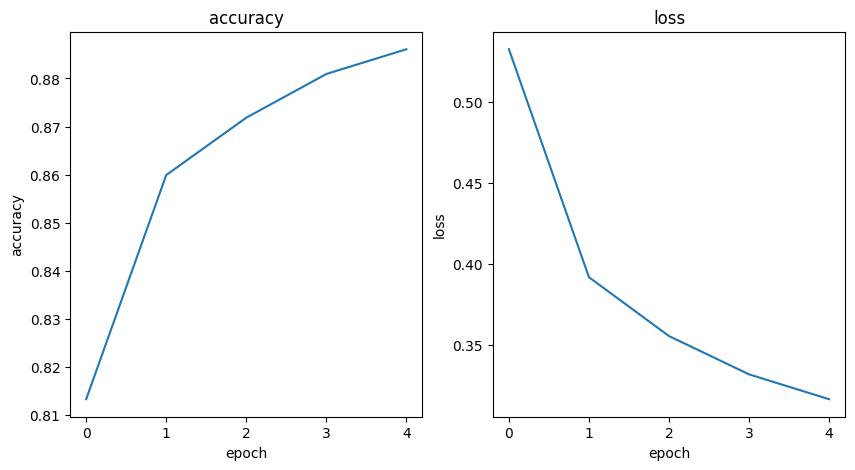

In [11]:
# 정확도, 로스 
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist.history['accuracy'])
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')

axs[1].plot(hist.history['loss'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].set_title('loss')

plt.show()



In [14]:
# 검증 손실 
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7673 - loss: 0.6739 - val_accuracy: 0.8467 - val_loss: 0.4321
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8581 - loss: 0.3987 - val_accuracy: 0.8543 - val_loss: 0.4093
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8728 - loss: 0.3553 - val_accuracy: 0.8662 - val_loss: 0.3803
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3265 - val_accuracy: 0.8765 - val_loss: 0.3523
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8886 - loss: 0.3135 - val_accuracy: 0.8743 - val_loss: 0.3626
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8926 - loss: 0.3000 - val_accuracy: 0.8806 - val_loss: 0.3567
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8975 - loss: 0.2875 - val_accuracy: 0.8852 - val_loss: 0.3533
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.2852 - 

In [13]:
hist.history

{'accuracy': [0.8124374747276306,
  0.859041690826416,
  0.8717708587646484,
  0.879687488079071,
  0.8873958587646484],
 'loss': [0.5328936576843262,
  0.39283037185668945,
  0.35542750358581543,
  0.3309796452522278,
  0.31373128294944763],
 'val_accuracy': [0.8476666808128357,
  0.8587499856948853,
  0.8704166412353516,
  0.8802499771118164,
  0.875166654586792],
 'val_loss': [0.4298973083496094,
  0.39031359553337097,
  0.3687613904476166,
  0.3475552201271057,
  0.35255512595176697]}

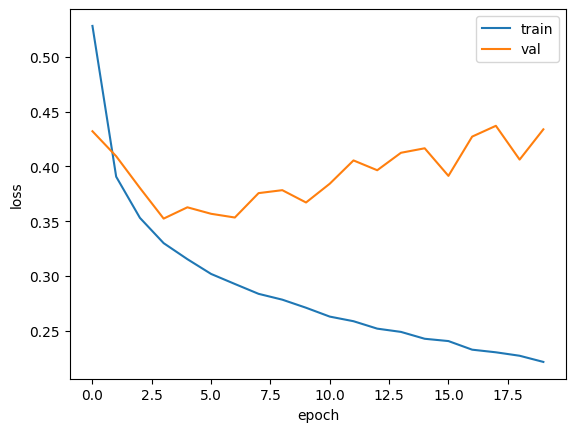

In [15]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
# 옵티마이저 - adam 
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001) # learning_rate : 기본값 0.1

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7650 - loss: 0.6854 - val_accuracy: 0.8332 - val_loss: 0.4580
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8575 - loss: 0.4077 - val_accuracy: 0.8629 - val_loss: 0.3849
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8742 - loss: 0.3491 - val_accuracy: 0.8708 - val_loss: 0.3593
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8793 - loss: 0.3315 - val_accuracy: 0.8798 - val_loss: 0.3405
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8848 - loss: 0.3133 - val_accuracy: 0.8722 - val_loss: 0.3535
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8927 - loss: 0.2915 - val_accuracy: 0.8827 - val_loss: 0.3318
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2805 - val_accuracy: 0.8786 - val_loss: 0.3291
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9019 - loss: 0.2635 - 

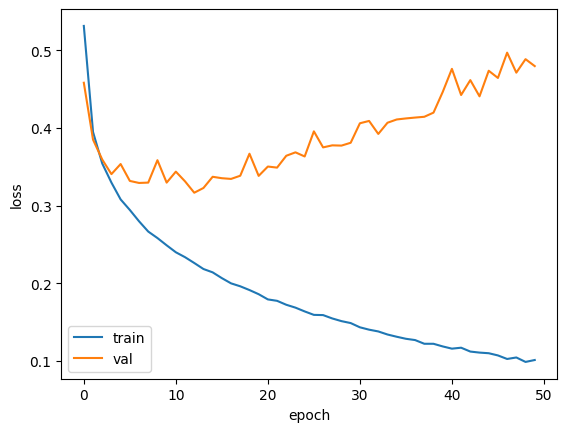

In [19]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
# 드롭아웃 : 설정된 비율만큼 은닉층의 출력을 랜덤하게 0으로 만든다 / 과대적합을 완화 / 0.1~0.5
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 은닉층의 출력 0으로 만든다.
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7297 - loss: 0.7691 - val_accuracy: 0.8420 - val_loss: 0.4334
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8373 - loss: 0.4535 - val_accuracy: 0.8538 - val_loss: 0.3930
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8498 - loss: 0.4178 - val_accuracy: 0.8575 - val_loss: 0.3842
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8579 - loss: 0.3927 - val_accuracy: 0.8686 - val_loss: 0.3574
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8672 - loss: 0.3684 - val_accuracy: 0.8743 - val_loss: 0.3471
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8667 - loss: 0.3630 - val_accuracy: 0.8717 - val_loss: 0.3409
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8707 - loss: 0.3495 - val_accuracy: 0.8717 - val_loss: 0.3516
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8701 - loss: 0.3464 - 

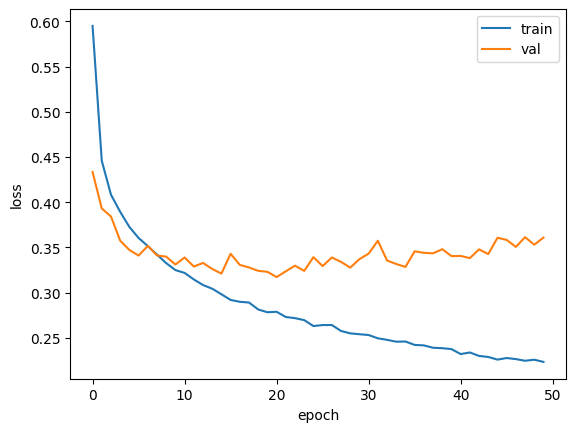

In [22]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
# 모델 저장, 복원 - 모델 저장, 가중치 저장

# 가중치 저장 - model.save_weights('파일명')  # 파일명 확장자 .weights.h5
model.save_weights("model.weights.h5")

In [24]:
# 모델 저장 : 구조 + 가중치 - model.save("파일명") # 파일명 확장자 .keras
model.save('model-whole.keras')

In [26]:
# 가중치 파일로 모델 복구 - 원래 모델의 구조가 필요!
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [31]:
import numpy as np
test_scaled = test_input / 255.0;
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [34]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.3868  


[0.38309916853904724, 0.8817999958992004]